In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
circle5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
circle3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
circle7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
circle11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

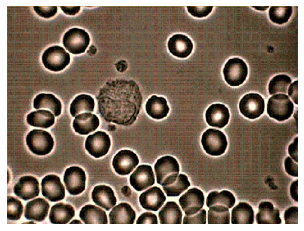

In [13]:
image = cv2.imread('orig_pic.png')
plt.axis('off')
plt.imshow(image)

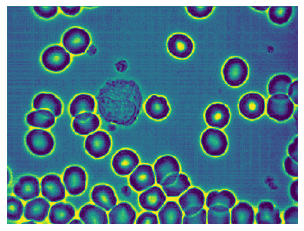

In [14]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray)

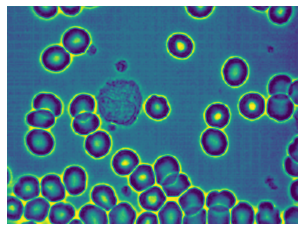

In [15]:

blurred = cv2.GaussianBlur(gray, (5, 5), 2)
plt.axis('off')
plt.imshow(blurred)

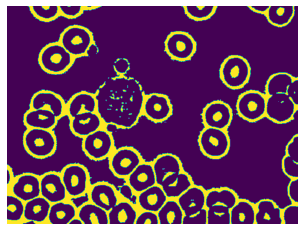

In [16]:
threshold, binarized = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(binarized)

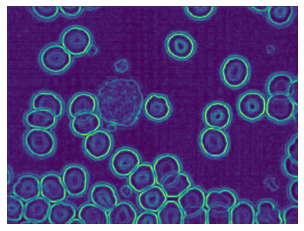

In [17]:
gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, circle5)
plt.axis('off')
plt.imshow(gradient)

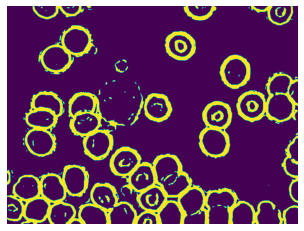

In [18]:
blurred_gradient = cv2.GaussianBlur(gradient, (5, 5), 2)
gradient_threshold, binarized_gradient = cv2.threshold(blurred_gradient, 0, 255, cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(binarized_gradient)

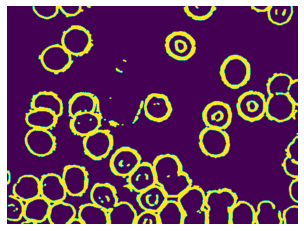

In [19]:
opened = cv2.morphologyEx(binarized_gradient, cv2.MORPH_OPEN, circle5)
plt.axis('off')
plt.imshow(opened)

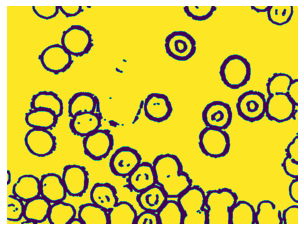

In [20]:
not_opened = cv2.bitwise_not(opened)
plt.axis('off')
plt.imshow(not_opened)

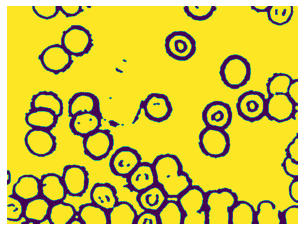

In [21]:
opened_not_opened = cv2.morphologyEx(not_opened, cv2.MORPH_OPEN, circle7)
plt.axis('off')
plt.imshow(opened_not_opened)

56


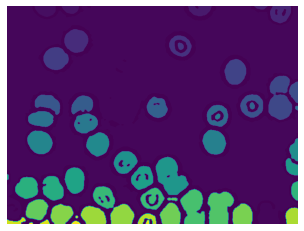

In [22]:
class_num, result = cv2.connectedComponents(opened_not_opened)
result = result.astype(np.uint8) * 4
print(class_num)
plt.axis('off')
plt.imshow(result)